In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
X = pd.DataFrame(load_breast_cancer()['data']).iloc[:, :2].values
y = load_breast_cancer()['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
cls = RandomForestClassifier(n_estimators=90)

In [4]:
cls = cls.fit(X_train,  y_train.reshape((-1,)))

In [5]:
y_pred = cls.predict(X_test)
mat = confusion_matrix(y_test, y_pred)

In [6]:
cls.classes_

array([0, 1])

In [7]:
probs = cls.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [8]:
f_p_r, t_p_r, ths = roc_curve(y_test, probs)
area = auc(f_p_r, t_p_r)

In [9]:
import matplotlib.pyplot as plt

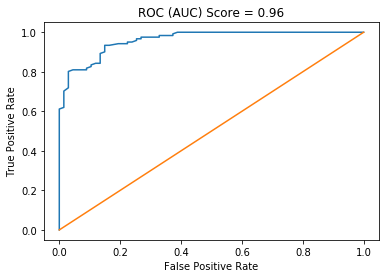

In [14]:
plt.title('ROC (AUC) Score = {0:.2f}'.format(area)  )
plt.plot(f_p_r, t_p_r)
plt.plot([0,1], [0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
print('Confusion Matrix\n',mat)

Confusion Matrix
 [[ 56  11]
 [ 10 111]]


In [16]:
np.random.seed(1)
y_true = np.random.randint(2, size=20)
y_pred = np.random.randint(2, size=20)

In [17]:
confusion_matrix(y_true=y_true, y_pred=y_pred)

array([[6, 3],
       [6, 5]], dtype=int64)

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
np.random.seed(1)
y_true = np.random.randint(2, size=20)
y_pred = np.random.randint(2, size=20)
mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
accuracy_score = (mat[0][0] + mat[1][1])/(mat[0][0] + mat[0][1] + mat[1][0] + mat[1][1])
recall_score = mat[1][1]/(mat[0][0]+mat[1][1])
precision_score = mat[1][1]/(mat[1][1]+mat[1][0])
f1_score = (2* precision_score * recall_score)/( precision_score + recall_score )

In [10]:
print('Accuracy Score:  {0:.2f}'.format(accuracy_score))
print('Recall Score:    {0:.2f}'.format(recall_score))
print('Precision Score: {0:.2f}'.format(precision_score))
print('F1 Score:        {0:.2f}'.format(f1_score))

Accuracy Score:  0.55
Recall Score:    0.45
Precision Score: 0.45
F1 Score:        0.45


In [1]:
import numpy as np

In [2]:
cm = np.array([[5,10], [3,200]])

In [3]:
cm

array([[  5,  10],
       [  3, 200]])

In [4]:
(200+5)/(205+10+3)

0.9403669724770642

In [5]:
200/205

0.975609756097561

In [8]:
r = (200)/(205)
p = (200)/(203)
r,p

(0.975609756097561, 0.9852216748768473)

In [9]:
(2* p * r)/( p + r )

0.9803921568627451